In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('/home/mariahwarren/sat_gpa_v1.csv')

In [5]:
df

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63
...,...,...
995,1000,2.19
996,1080,1.50
997,1140,3.17
998,1200,1.94


In [7]:
df.head()

,sat_sum,fy_gpa
0,1270,3.18
1,1220,3.33
2,1160,3.25
3,950,2.42
4,1070,2.63


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sat_sum  1000 non-null   int64  
 1   fy_gpa   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [11]:
df.describe()

,sat_sum,fy_gpa
count,1000.000000,1000.000000
mean,1033.290000,2.467950
std,142.873681,0.740805
min,530.000000,0.000000
25%,930.000000,1.980000
50%,1030.000000,2.465000
75%,1130.000000,3.020000
max,1440.000000,4.000000


In [13]:
for column in df.columns:
    print(df[column].name)
    print(df[column].unique())

sat_sum
[1270 1220 1160  950 1070 1110 1150 1440  850 1280 1020  880 1080 1200
 1120  970 1210 1030 1400  720 1170  860  920 1350  910  980  800 1320
  900 1260  830 1330  810 1240  820 1140  870 1010  760 1230 1100 1090
 1300 1040  890  960 1060  990 1050 1130  750  940  930  790  740 1250
 1360 1310 1190 1410 1290 1370 1340 1000  700  710  670  840 1180  770
  650  530  780  730 1420]
fy_gpa
[3.18 3.33 3.25 2.42 2.63 2.91 2.83 2.51 3.82 2.54 3.38 3.02 2.6  3.81
 3.48 2.15 3.8  3.13 3.4  3.59 1.62 3.61 0.   3.72 0.87 2.79 2.   3.69
 2.49 3.92 3.05 2.4  2.71 1.58 1.38 2.52 2.16 2.57 2.64 2.47 1.   2.73
 2.3  2.37 2.11 3.29 2.67 2.78 2.94 4.   2.9  2.92 1.91 3.11 2.02 3.51
 3.24 2.65 1.74 1.54 2.34 2.08 2.19 1.8  2.22 2.95 2.89 2.66 2.18 2.81
 2.06 2.8  2.59 2.33 3.55 2.75 2.98 1.28 1.24 2.93 2.48 1.17 2.04 3.
 2.55 1.86 2.09 3.94 2.28 2.43 2.77 2.39 3.63 1.78 3.22 3.6  1.84 3.3
 3.7  2.38 2.97 3.37 1.33 3.75 2.24 2.44 2.72 1.69 3.19 3.1  3.45 3.36
 3.08 3.16 3.66 3.79 3.06 2.96 2.13 1.

In [15]:
df.isna().sum()

sat_sum    0
fy_gpa     0
dtype: int64

In [17]:
df.duplicated().sum()

49

In [35]:
x=df['sat_sum']
x

0      1270
1      1220
2      1160
3       950
4      1070
       ... 
995    1000
996    1080
997    1140
998    1200
999     930
Name: sat_sum, Length: 1000, dtype: int64

In [37]:
y=df['fy_gpa']
y

0      3.18
1      3.33
2      3.25
3      2.42
4      2.63
       ... 
995    2.19
996    1.50
997    3.17
998    1.94
999    2.38
Name: fy_gpa, Length: 1000, dtype: float64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
len(x_train)

800

In [43]:
len(y_train)

800

In [45]:
model=LinearRegression()
model

LinearRegression()

In [47]:
model.fit(pd.DataFrame(x_train),pd.DataFrame(y_train))

LinearRegression()

In [49]:
y_pred=model.predict(pd.DataFrame(x_test))

In [51]:
pd.DataFrame(y_pred)

,0
0,2.502613
1,2.030232
2,2.195565
3,2.455375
4,2.691565
...,...
195,2.431756
196,2.620708
197,2.927755
198,2.290042


In [53]:
y_test

521    2.54
737    2.98
740    1.24
660    1.13
411    2.37
       ... 
408    3.16
332    3.13
208    3.19
613    2.04
78     2.67
Name: fy_gpa, Length: 200, dtype: float64

In [55]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.47295885364592855
R-squared: 0.20167022140686153


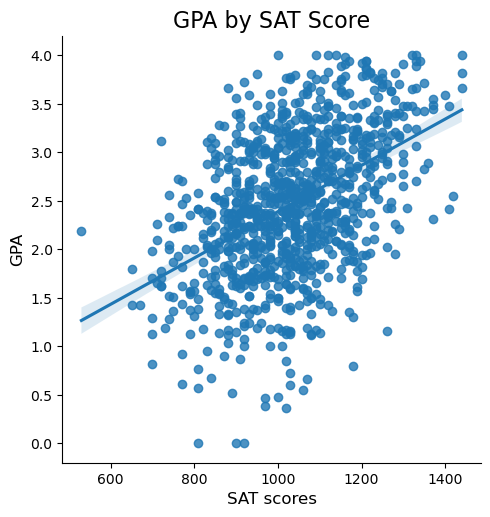

In [61]:
sns.lmplot(data=df,x='sat_sum',y='fy_gpa')
plt.title('GPA by SAT Score',fontsize=16)
plt.xlabel('SAT scores',fontsize=12)
plt.ylabel('GPA',fontsize=12)
plt.show()

After viewing the mean_squared_error, the r2_score, and the linear regression plot, I've come to the conclusion that there is a somewhat significant relationship between the independent and dependent variables. The mean_squared_error is about 0.47, which is close to 0.5. Also, the linear regression plot shows a positive correlation between SAT scores and GPA, although it's not a really strong correlation.